In [1]:
#Dependencies 
import pandas as pd
from pathlib import Path

In [2]:
#Loading CSV File 
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [13]:
#Inital Shape of DF
df.shape

(618, 14)

In [3]:
#Removing MYOPIC Column
df=df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
#Scaling Data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["AGE","SPHEQ","AL","ACD","LT","VCD","SPORTHR","READHR","COMPHR","STUDYHR","TVHR","DIOPTERHR"]])


In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(scaled_data)

In [10]:
#PCA Variance Ratio
pca.explained_variance_ratio_

array([0.24695414, 0.18186006, 0.09829041, 0.08588194, 0.08133361,
       0.07500652, 0.07368382, 0.06079662])

In [11]:
#Shape
myopia_pca.shape


(618, 8)

In [14]:
#Reducing dataset dimensions with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca)

c:\Users\Jeremiah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [15]:
#TSNE Shape
tsne_features.shape


(618, 2)

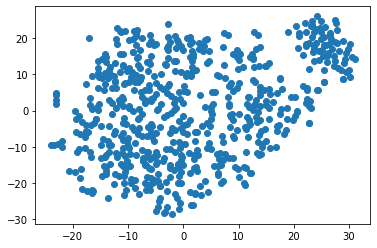

In [16]:
#TSNE scatter plot
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [18]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

c:\Users\Jeremiah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,6702.633602
1,2,5549.314792
2,3,4784.733220
3,4,4423.800136
4,5,4153.762538
5,6,3934.748594
6,7,3741.946906
7,8,3593.088686
8,9,3458.168327
9,10,3348.046531


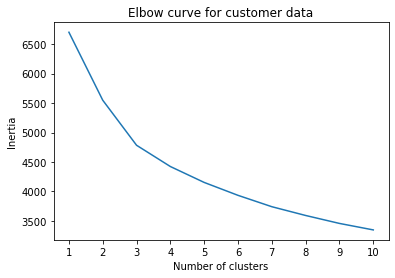

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.title('Elbow curve for myopia data')
plt.show()

Part 4: Make a Recommendation 
The patients can't be clustered in an accurate way. The dataset needs to be larger.